**EC 414 - Spring 2019 - Prof. Kulis - HW 4 - Clustering (K-Means, DP-Means)**



Due Wed. March 27, 2019 - Before class starts.

**Problem 1:  K-Means**

Here you will apply K-Means on simple Gaussian data. You are given some code to guide you in implementing this clustering method.  Use of online code for K-Means is prohibited; use of the built-in scikitlearn function for K-Means is also prohibited. 
    

**(a)** Generate $3$ $2$D Gaussian clusters of data with the following means and covariances:

$\boldsymbol{\mu}_1 = [2,2]^T, \boldsymbol{\mu}_2 = [-2,2]^T, \boldsymbol{\mu}_3 = [0,-2]^T$,

$\Sigma_1 = [[0.02,0];[0,0.02]]$, $\Sigma_2 = [[0.2,0];[0,0.2]]$, $\Sigma_3 = [[0.05,0];[0,0.05]]$ 

Let each cluster of data have $50$ points. Plot the generated Gaussian data.

(-3.368353552742365,
 2.6517029014598084,
 -3.067004043974018,
 3.4394842466650215)

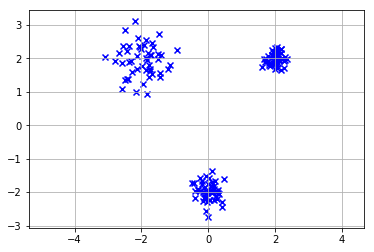

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def scatter_plot(x_axis, y_axis, x_label='', y_label='', color='b', marker='x', name='', title = ''):
    plt.scatter(x_axis, y_axis, c = color, marker = marker ,label = name)
    plt.grid(zorder=0)
    if (title != ''):
        plt.title(title)
    if (x_label != ''):
        plt.xlabel(x_label)
    if (y_label != ''):
        plt.ylabel(y_label)

# Generate 2D Gaussian Data with 3 clusters of 3 different means
# Write code here:
mean_one = np.array([2,2])
mean_two = np.array([-2,2])
mean_three = np.array([0,-2])
covariance_one = np.array([[0.02,0],[0,0.02]])
covariance_two = np.array([[0.2,0],[0,0.2]])
covariance_three = np.array([[0.05,0],[0,0.05]])

one = np.random.multivariate_normal(mean_one, covariance_one, 50)
two = np.random.multivariate_normal(mean_two, covariance_two, 50)
three = np.random.multivariate_normal(mean_three, covariance_three, 50)
# Plotting
# Write code here:
scatter_plot([i[0] for i in one], [i[1] for i in one])
scatter_plot([i[0] for i in two], [i[1] for i in two])
scatter_plot([i[0] for i in three], [i[1] for i in three])
plt.axis('equal')

**(b)** Implement K-Means and apply it to the Gaussian data above. The code below contains comments of what needs to be coded up at a specific part of the code.  Please write your code below these comments where necessary. 

Plot the created clusters per iteration in different colors. For convergence of the algorithm (stopping criterion), check whether the derived cluster means become stationary (don't change over iterations).  

Iteration:  1


C:\Users\ryanr\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:84: RuntimeWarning: invalid value encountered in true_divide


Iteration:  2


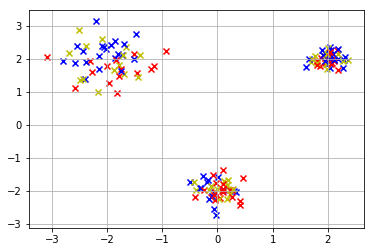

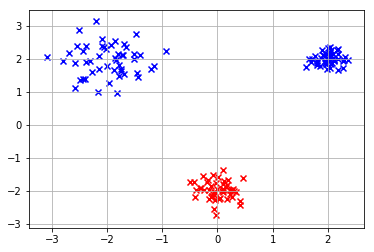

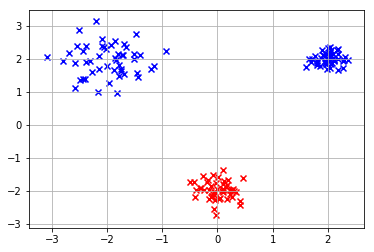

In [21]:
## K-Means implementation:

num_clusters = 3

### CODE 1 - Randomly initialize 3 means: ###
## Write code below here:
cluster_mean = np.zeros((num_clusters,2))
# for i in range(3):
#     cluster_mean[i] = 2*np.random.rand(1,2)
DATA = np.concatenate((one ,two ,three))
# ##############################################
# initializations
labels = np.ones((DATA.shape[0],1),dtype=np.int8)
converged = 0
iteration = 0
convergence_threshold = 2

for i in range(DATA.shape[0]):
    labels[i][0] = np.random.randint(1,4)
init_num = np.zeros(3)
init_tmp_mean = np.zeros((3,2))

for i in range(DATA.shape[0]):
    if (labels[i][0] == 1):
        init_num[0] += 1
        init_tmp_mean[0] += DATA[i]
    elif (labels[i][0] == 2):
        init_num[1] += 1
        init_tmp_mean[1] += DATA[i]
    else:
        init_num[2] += 1
        init_tmp_mean[2] += DATA[i]
    
for i in range(3):
    init_tmp_mean[i] /= init_num[i]
    cluster_mean = init_tmp_mean

plt.figure(1)
for i in range(DATA.shape[0]):
    if (labels[i][0] == 1):
        scatter_plot(DATA[i][0], DATA[i][1], color = 'b')
    elif (labels[i][0] == 2):
        scatter_plot(DATA[i][0], DATA[i][1], color = 'r')
    else:
        scatter_plot(DATA[i][0], DATA[i][1], color = 'y')
            
while (converged==0):
    iteration += 1
    print('Iteration: ',iteration)
    
    objective = 0
    for i in range(DATA.shape[0]):
        objective += (DATA[i][0] - cluster_mean[labels[i][0]-1][0])**2 + (DATA[i][1] - cluster_mean[labels[i][0]-1][1])**2
    ### CODE 2 - Assignment Step - Assign each data observation to the cluster with the nearest mean: ###
    ## Write code below here:
    for i in range(DATA.shape[0]):
        distance = (DATA[i][0] - cluster_mean[0][0])**2 + (DATA[i][1] - cluster_mean[0][1])**2
        cluster_id = 1
        for j in range(2):
            tmp_distance = (DATA[i][0] - cluster_mean[j+1][0])**2 + (DATA[i][1] - cluster_mean[j+1][1])**2
            if (tmp_distance < distance):
                distance = tmp_distance
                cluster_id = j+2
        labels[i][0] = cluster_id
    
    ###################################################################
    
    
    ### CODE 3 - Mean Updating - Update the cluster means ###
    ## Write code below here:
    num = np.zeros(3)
    tmp_mean = np.zeros((3,2))
    for i in range(DATA.shape[0]):
        if (labels[i][0] == 1):
            num[0] += 1
            tmp_mean[0] += DATA[i]
        elif (labels[i][0] == 2):
            num[1] += 1
            tmp_mean[1] += DATA[i]
        else:
            num[2] += 1
            tmp_mean[2] += DATA[i]
    for i in range(3):
        tmp_mean[i] /= num[i]
    cluster_mean = tmp_mean
    
    ###########################################################
    
    ### CODE 4 - Check for convergence ###
    ## Write code below here:
    new_objective = 0

    for i in range(DATA.shape[0]):
        new_objective += (DATA[i][0] - cluster_mean[labels[i][0]-1][0])**2 + (DATA[i][1] - cluster_mean[labels[i][0]-1][1])**2
    if ( abs(new_objective - objective) < convergence_threshold):
        converged=1
    
    #############################################################
    
    ### CODE 5 - Plot clustering results after each iteration: ###
    ## Write code below here:
    plt.figure(iteration+2)
    for i in range(DATA.shape[0]):
        if (labels[i][0] == 1):
            scatter_plot(DATA[i][0], DATA[i][1], color = 'b')
        elif (labels[i][0] == 2):
            scatter_plot(DATA[i][0], DATA[i][1], color = 'r')
        else:
            scatter_plot(DATA[i][0], DATA[i][1], color = 'y')

    
    ###################################################################



**Problem 2: DP Means**

Here, you will implement DP-Means and test it out on National Basketball Association (NBA) data from the 2018-2019 season (currently ongoing season).



**(a)** Describe what the $\lambda$ parameter does in the DP-Means algorithm discussed in class. 

**(b)** Read in the NBA data from the ''NBA_stats_2018_2019.xlsx'' file and plot the Minutes Per Game (MPG) vs Points Per Game (PPG) statistics for all NBA players (a player is represented by a row of the data).  

a.
<br>
$\lambda$ penalize big number of clusters and add more clusters if and only if nthe smallest distance is greater than lambda. Thus, $\lambda$ elinminate the need to predefine the number of clusters.

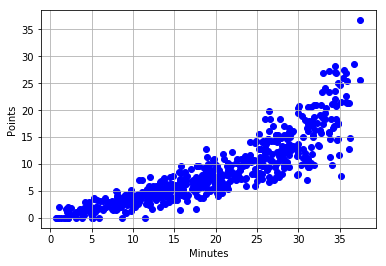

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

################################
## Load data from spreadsheet ##
################################
nba_stats = pd.read_excel('NBA_stats_2018_2019.xlsx', index_col = 0)
# Write code here
############################
MPG = nba_stats['MPG']
PPG = nba_stats['PPG']
## Plot data - MPG vs PPG ##
############################
scatter_plot(MPG, PPG, x_label='Minutes', y_label='Points', color='b', marker='o')
# Write code here

**(c)** Implement DP-Means and apply it to the $2$D (MPG, PPG) NBA data obtained above. The code below contains comments of what needs to be coded up at a specific part of the code.  Please write your code below these comments where necessary. Use of online code for DP-Means is prohibited; use of any Python built-in function for DP-Means is also prohibited. 

Plot the created clusters per iteration in different colors. For convergence of the algorithm (stopping criterion), check whether the derived cluster means become stationary (don't change over iterations) and the number of existing clusters also stays the same.  

Current iteration:  1


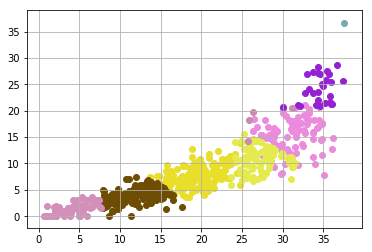

Current iteration:  2


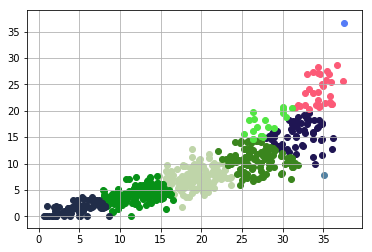

Current iteration:  3


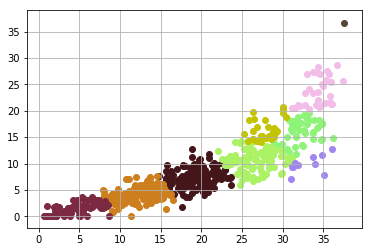

Current iteration:  4


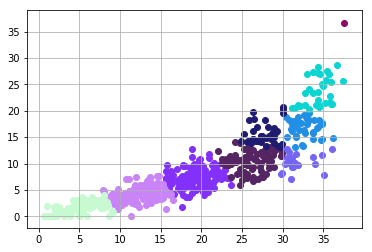

Current iteration:  5


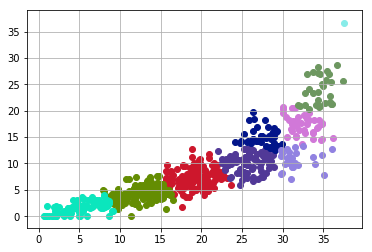

Current iteration:  6


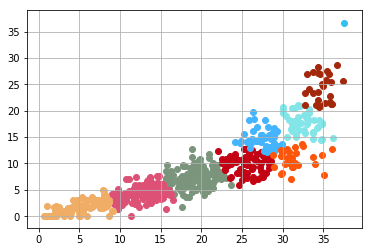

Current iteration:  7


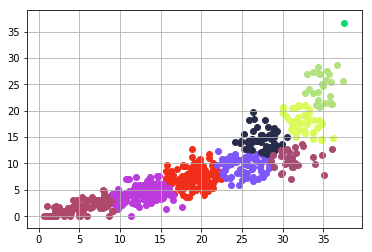

Current iteration:  8


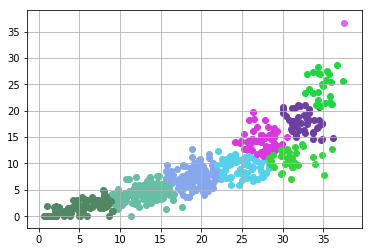

In [4]:
## DP-Means Implementation: ##

# Parameter Initializations
LAMBDA = 8
convergence_threshold = 1

### DP Means - Initializations for algorithm ###
# cluster count
K = 1

# sets of points that make up clusters
L = []
L.append(range(num_points))

# Class indicators/labels
Z = np.ones((1,num_points))

# means
MU = []
MU.append(np.mean(data_matrix,axis=0))
################################################

# Initializations for algorithm:
converged = 0
t = 0
while converged == 0:
    t += 1
    print('Current iteration: ',t)
    
    ## Per Data Point: ##
    for i in np.arange(num_points):
        
        ### CODE 1 - Calculate distance from current point to all currently existing clusters ###
        ## Write code below here:
        

        #########################################################################################
        
        
        ### CODE 2 - Look at how the min distance of the cluster distance list compares to LAMBDA ###
        ## Write code below here:

        if ( ___ > LAMBDA):
            # make new cluster solely consisting of the new point

        else:
            # assign point to the closest cluster

        #############################################################################################
    
    ### CODE 3 - Form new sets of points (clusters) ###
    ## Write code below here:

    
    ##################################################################
    
    ### CODE 4 - Recompute means per cluster ###
    ## Write code below here:

    
    ####################################################
    
    ### CODE 5 - Plot clustered data per iteration ###
    ## Write code below here:

    
    ##########################################################
    
    ### CODE 6 - Test for convergence: number of clusters doesn't change and means stay the same ###
    ## Write code below here:
    
    if (_______):
        converged = 1
    else:
        converged = 0
    ####################################################





**(d)** Run the DP-Means code created above for the following $\lambda$ values:

$\underline{\lambda} = [4,10,14,24]$.

 Plot the resulting clusters for each $\lambda$ value and discuss the results.   

In [1]:
# Plotting of results for different lambdas:

print('LAMBDA: 4','\n\n')
##############
# Lambda - 4##
##############

# Write code here

print('LAMBDA: 10','\n\n')
##############
# Lambda - 10#
##############

# Write code here

print('LAMBDA: 14','\n\n')
##############
# Lambda - 14#
##############

# Write code here

print('LAMBDA: 24','\n\n')
##############
# Lambda - 24#
##############

# Write code here



## discussion of results?

LAMBDA: 4 


LAMBDA: 10 


LAMBDA: 14 


LAMBDA: 24 


